In [45]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats, integrate
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
import bs4 as bs
import requests
import yfinance as yf
import seaborn as sns
import cvxpy as cp
from sklearn.cluster import AgglomerativeClustering

In [46]:
#read in stock data from pi
SP_Close = pd.read_pickle('SP_Close.pkl')
SP_train = SP_Close[:'2018-01-01']
SP_test = SP_Close['2018-01-01':]

In [47]:
import os

print(os.getcwd())

C:\Users\taino\Downloads\ORIE5370


In [48]:
import os

files = []

# print(os.listdir(os.getcwd()))
for i in os.listdir(os.getcwd()+'\\final_res3'):
#     print(i)
    if '.pkl' in i and 'arrr_' in i:
        files.append(i)
#         print(i)
        
print(files)

['arrr_1652840184.pkl', 'arrr_1652840648.pkl']


In [27]:
import pickle

with open('final_res1\\arrr_1652829789.pickle', 'rb') as handle:
    origg = pickle.load(handle)
print(origg)
print(len(origg))

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\Users\\taino\\anaconda3\\lib\\site-packages\\pandas\\_libs\\internals.cp38-win_amd64.pyd'>

In [28]:
print(pickle.HIGHEST_PROTOCOL)

5


In [19]:
files = ['arrr_1652828480.pkl', 'arrr_1652829247.pkl', 'arrr_1652829400.pkl', 'arrr_1652829790.pkl']

In [49]:
import pickle

res = {}

for i in files:
    with open(os.getcwd()+'\\final_res3\\'+i, 'rb') as handle:
        print(handle)
        try:
            orig = pickle.load(handle)
        except AttributeError:
            orig = pd.read_pickle(handle)
    for j in orig.keys():
        print(j)
#         if j in res:
#             assert(np.allclose(orig[j], res[j]))
#         else:
        if j not in res:
            res[j] = orig[j]

            print(len(res))

<_io.BufferedReader name='C:\\Users\\taino\\Downloads\\ORIE5370\\final_res3\\arrr_1652840184.pkl'>
(63, 759, 63, False, (-0.002, 0.1), 6, -0.05, 0.75, 0.05, 50, True)
1
(63, 1812, 63, False, (-0.002, 0.1), 6, -0.05, 0.75, 0.05, 50, True)
2
(63, 506, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, None, True)
3
(63, 506, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, 50, True)
4
<_io.BufferedReader name='C:\\Users\\taino\\Downloads\\ORIE5370\\final_res3\\arrr_1652840648.pkl'>
(63, 1812, 63, False, (-0.002, 0.1), 6, -0.05, 0.75, 0.05, None, True)
5
(63, 1812, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, 50, True)
6
(63, 1812, 63, False, (-0.002, 0.1), 5, -0.05, 0.75, 0.05, 50, True)
7
(63, 759, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, 50, True)
8
(63, 759, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, None, True)
9
(63, 1812, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, None, True)
10
(63, 506, 63, False, (-0.002, 0.1), 5, -0.05, 0.75, 0.05, None, True)
11
(63, 506, 63, F

In [50]:
ctt = 0

for i in res.keys():
    if res[i] is None:
        ctt += 1

print(ctt)

3


In [51]:
print(len(res))

18


In [38]:
with open("res_old1.pickle", 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
def Portfolio_backtest(weight_vector, securities_vector=SP_train,daily_rebalance = False,title=None):
    weight_vector_n = weight_vector
    weight_vector_n = weight_vector.reindex(weight_vector.index.union(securities_vector.index))
    weight_vector_n = weight_vector_n[weight_vector.index[0]:]
    return_frame = np.exp(np.log(securities_vector).diff())-1
    return_frame = return_frame[weight_vector.index[0]:]
    if daily_rebalance:
        weight_vector_n=weight_vector_n.ffill()
    else:
        for p in range(len(weight_vector_n)):
            if np.isnan(weight_vector_n.iloc[p,1]):
                new_weights_unnormalized = weight_vector_n.iloc[p-1,:]*(return_frame.iloc[p-1,:]+1)
                weight_vector_n.iloc[p,:] = new_weights_unnormalized/sum(new_weights_unnormalized)
                


    weighted_returns=weight_vector_n.shift(1)*return_frame
    port_returns = np.sum(weighted_returns, axis=1) #shift so that we are using the weights we had over that period rather than the ones we found with hindsight
    port_returns = port_returns[weight_vector.index[0]:]
    total_return=(port_returns+1).cumprod()
    total_return.plot()
#     reports.metrics(port_returns,mode='basic')
    plt.title('Cumulative Return')
    if title != None:
        plt.title(title)
        plt.savefig(title)
    return total_return

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
15


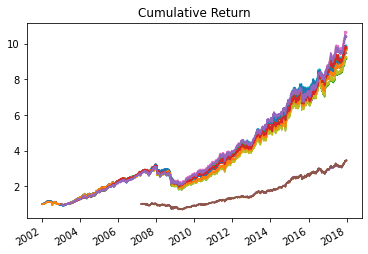

In [53]:
ctt = 0
resnew = {}

for i in res.keys():
    if res[i] is not None:
        resnew[i] = Portfolio_backtest(res[i])
        ctt += 1
        print(ctt)
print(len(resnew))

In [54]:
print(resnew)

{(63, 759, 63, False, (-0.002, 0.1), 6, -0.05, 0.75, 0.05, 50, True): 2003-01-10    1.000000
2003-01-13    0.998382
2003-01-14    1.002533
2003-01-15    1.000431
2003-01-16    1.001577
                ...   
2017-12-22    9.814698
2017-12-26    9.807036
2017-12-27    9.823912
2017-12-28    9.839844
2017-12-29    9.818251
Length: 3770, dtype: float64, (63, 1812, 63, False, (-0.002, 0.1), 6, -0.05, 0.75, 0.05, 50, True): 2007-03-20    1.000000
2007-03-21    1.010081
2007-03-22    1.012356
2007-03-23    1.018039
2007-03-26    1.012427
                ...   
2017-12-22    3.436400
2017-12-26    3.441321
2017-12-27    3.442646
2017-12-28    3.449355
2017-12-29    3.435550
Length: 2717, dtype: float64, (63, 506, 63, False, (-0.002, 0.1), 4, -0.05, 0.75, 0.05, None, True): 2002-01-09    1.000000
2002-01-10    1.000221
2002-01-11    0.995311
2002-01-14    1.000533
2002-01-15    1.005610
                ...   
2017-12-22    9.124951
2017-12-26    9.128215
2017-12-27    9.147073
2017-12-28    9.

In [55]:
with open("res_old3.pickle", 'wb') as handle:
    pickle.dump(resnew, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
import pickle

with open("res_old.pickle", 'rb') as handle:
    res_dict = pickle.load(handle)
print(len(res_dict))
print(res_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'res_old1.pickle'

In [39]:
num_63 = 0
num_253 = 0

for i in res_dict.keys():
    if res_dict[i] is not None:
        if i[0] == i[2] and i[0] == 63:
            num_63 += 1
        elif i[0] == i[2] and i[0] == 253:
            num_253 += 1
            
print(num_63)
print(num_253)

278
284


In [40]:
num_63 = 0
num_253 = 0

for i in res_dict.keys():
    if res_dict[i] is not None:
        if i[0] != i[2] and i[0] == 63:
            num_63 += 1
        elif i[0] != i[2] and i[0] == 253:
            num_253 += 1
            
print(num_63)
print(num_253)

238
0


In [21]:
print(res[j])

2005-01-13    0.000000
2005-04-15    0.052360
2005-07-15    0.125928
2005-10-13   -0.028780
2006-01-13    0.186606
2006-04-17    0.069398
2006-07-17   -0.012516
2006-10-13    0.015915
2007-01-17    0.010804
2007-04-18    0.014848
2007-07-18   -0.036519
2007-10-16    0.018120
2008-01-16    0.048111
2008-04-17   -0.081535
2008-07-17   -0.010088
2008-10-15   -0.182436
2009-01-15   -0.107488
2009-04-17   -0.081116
2009-07-17    0.006583
2009-10-15   -0.053419
2010-01-15    0.035027
2010-04-19    0.076592
2010-07-19   -0.037617
2010-10-15    0.075122
2011-01-14    0.048629
2011-04-15    0.076318
2011-07-18    0.036865
2011-10-14    0.037945
2012-01-17   -0.010075
2012-04-17    0.024709
2012-07-17    0.091935
2012-10-15   -0.033922
2013-01-17   -0.026552
2013-04-19    0.124865
2013-07-19   -0.020092
2013-10-17    0.026810
2014-01-17    0.079651
2014-04-21   -0.004551
2014-07-21    0.062615
2014-10-17   -0.011543
2015-01-20    0.166949
2015-04-21   -0.019902
2015-07-21    0.039302
2015-10-19 

In [ ]:
PICKLE_NAME = "cc3.pickle"
with open(PICKLE_NAME, 'rb') as handle:
    list_of_tuples_all = pickle.load(handle)
print(list_of_tuples_all[0],list_of_tuples_all[-1])
print(list_of_tuples_all)

In [ ]:
list_of_tuples_all.reverse()
print(list_of_tuples_all[0],list_of_tuples_all[-1])
print(list_of_tuples_all)

In [ ]:
with open("cc3_new.pickle", 'wb') as handle:
    pickle.dump(list_of_tuples_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open("cc3_new.pickle", 'rb') as handle:
    list_of_tuples_all = pickle.load(handle)
print(list_of_tuples_all[0],list_of_tuples_all[-1])
print(list_of_tuples_all)

In [35]:
assert("new" in "cc3.pickle")

AssertionError: 